In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torch.distributions import *
from distribution import *

# Set global font size
plt.rcParams.update({'font.size': 14})

In [3]:
min_v, max_v = 0, 35
X = torch.linspace(min_v, max_v, 100).unsqueeze(1)

mean, std = 1., 5.

q = 0.99

n = Normal(loc=mean, scale=std)
fn = FoldedNormal(loc=mean, scale=std)

In [4]:
pdf_n = n.log_prob(X).exp()
pdf_fn = fn.log_prob(X).exp()
cdf_n = n.cdf(X)
cdf_fn = fn.cdf(X)

### see https://en.wikipedia.org/wiki/Folded_normal_distribution

Text(0, 0.5, 'pdf')

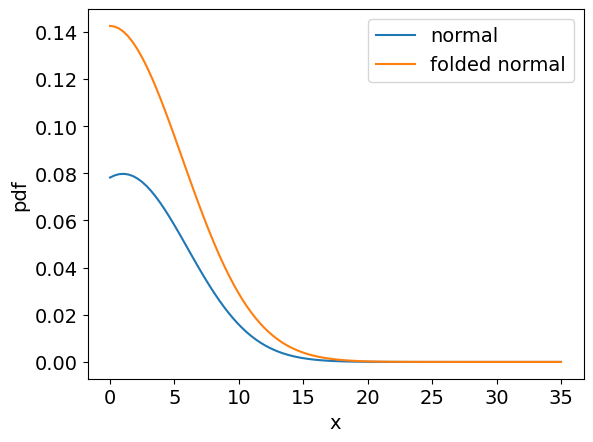

In [5]:
plt.plot(X.squeeze().detach().numpy(), pdf_n.squeeze().detach().numpy(), label='normal')
plt.plot(X.squeeze().detach().numpy(), pdf_fn.squeeze().detach().numpy(), label='folded normal')
plt.legend()
plt.xlabel('x')
plt.ylabel('pdf')

Text(0, 0.5, 'cdf')

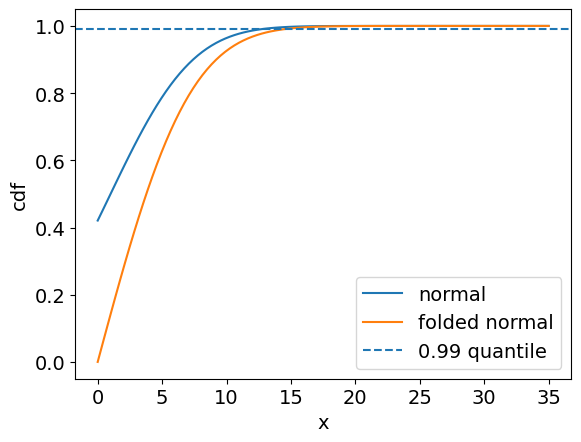

In [6]:
plt.plot(X.squeeze().detach().numpy(), cdf_n.squeeze().detach().numpy(), label='normal')
plt.plot(X.squeeze().detach().numpy(), cdf_fn.squeeze().detach().numpy(), label='folded normal')
plt.axhline(q, ls='--', label=f'{q} quantile')
plt.legend()
plt.xlabel('x')
plt.ylabel('cdf')


In [7]:
d_fn = DiscretizedDistribution(base_distribution={
    'class_name': 'distribution.FoldedNormal',
    'args': {
        'loc': mean,
        'scale': std
    }
}) 
d_fn.to('cpu')

In [8]:
X = torch.arange(min_v, max_v).unsqueeze(1).float()
pdf_d_fn = d_fn.log_prob(X).exp()
cdf_d_fn = d_fn.cdf(X)

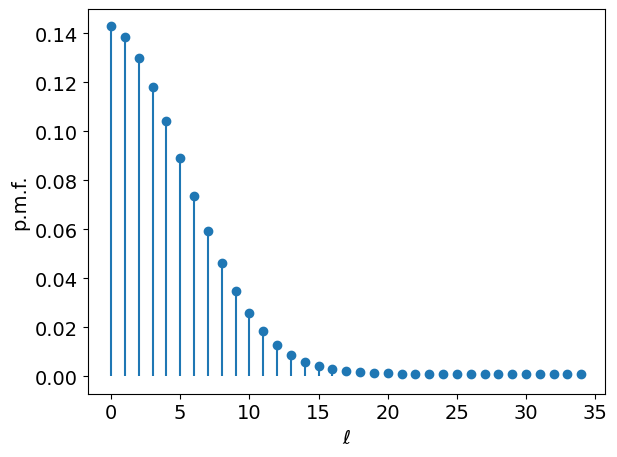

In [9]:
plt.stem((X).squeeze().detach().numpy(), pdf_d_fn.squeeze().detach().numpy(), basefmt=" ")
plt.xlabel(rf'$\ell$')
plt.ylabel('p.m.f.')
plt.tight_layout()
plt.savefig('images/discrete_folded_normal.pdf')

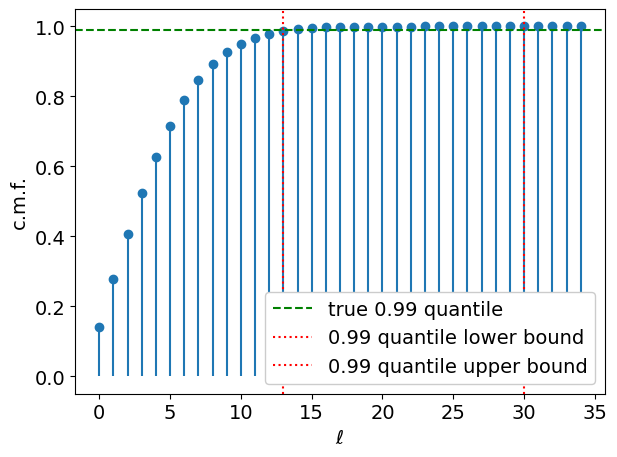

In [12]:
l, u = fn.quantile(p=q)
l, u = torch.floor(l), torch.ceil(u)

X = torch.arange(min_v, max_v).unsqueeze(1).float()
plt.stem((X).squeeze().detach().numpy(), cdf_d_fn.squeeze().detach().numpy(), basefmt=" ")

plt.axhline(q, ls='--', label='true 0.99 quantile', c='green')
plt.axvline(l.numpy(), ls='dotted', label=f'0.99 quantile lower bound', c='red')
plt.axvline(u.numpy(), ls='dotted', label=f'0.99 quantile upper bound', c='red')
legend = plt.legend(loc='lower right')
legend.get_frame().set_alpha(None)
plt.xlabel(rf'$\ell$')
plt.ylabel('c.m.f.')
plt.tight_layout()
plt.savefig('images/bounds.pdf')

In [ ]:
print(fn.quantile(p=q), d_fn.quantile(p=q))